In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = ["bert", "dlrm", "maskrcnn", "resnet", "rnnt", "unet"]

logs = # TO FILL
graph_dir = f"{logs}/graphs/accuracy"
processed_log_dir = f"{logs}/resultats_11-23_processed"

summarydf = pd.read_csv(f"{processed_log_dir}/summary.csv").drop(columns=["Unnamed: 0"])

In [2]:
sns.set_theme(
    style="whitegrid",
    palette="muted",
    font="serif"
    )

# Energy

Text(0.5, 0, 'Model')

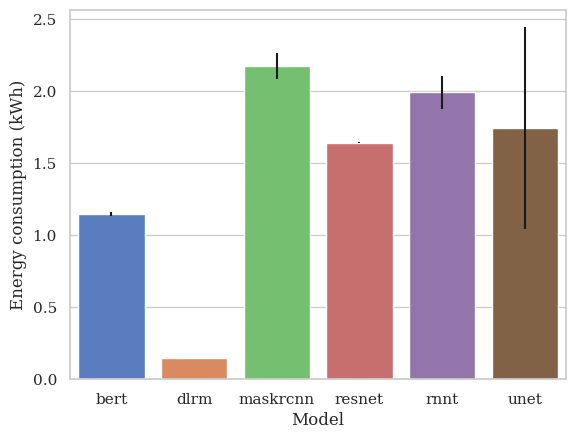

In [3]:
data = summarydf.groupby(["model"]).agg({"energy_kWh":["mean", "std"]})

fig, ax = plt.subplots()
ax = sns.barplot(x=data.index, y=data[("energy_kWh", "mean")], yerr=data[("energy_kWh", "std")]) 
ax.set_ylabel("Energy consumption (kWh)")
ax.set_xlabel("Model")

# Training time

In [4]:
# pd.set_option('display.max_colwidth', 4)
# pd.set_option('display.max_rows', 67)
summarydf.groupby(["model"]).first().dropna(axis=1).style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,start_time_ms,end_time_ms,mllog_train_samples,mllog_eval_samples,node_nb,time_ms,time_s,time_m,run_start,run_stop,init_start,init_stop,energy_kWh_run,energy_kWh_init,energy_kWh_time,cpu_utilization_time,gpu_utilization_time,duration_run,duration_init,duration_time,duration_run(min),duration_init(min),duration_time(min),ILO_energy_kWh,ILO_energy_kWh_run,ILO_energy_kWh_init,ILO_energy_kWh_time
model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bert,126224,1.149060,4136617.736727,4136617736.727173,1699268702000.000000,1699269955000.000000,3003264,10000,1,1253000.000000,1253.000000,20.883333,1699371622854.000000,1699373067044.000000,1699371582732.000000,1699371622853.000000,0.000000,0.000000,1.132638,6.860847,96.671990,1444190.000000,40121.000000,1253000.000000,24.069833,0.668683,20.883333,1.202052,0.000000,0.000000,1.163921
dlrm,126295,0.148527,534696.058192,534696058.191772,1699287628000.000000,1699287878000.000000,3775334400,89137319,1,250000.000000,250.000000,4.166667,1699392596621.000000,1699395714245.000000,1699392556100.000000,1699392596617.000000,0.000000,0.000000,0.135051,5.353887,56.960351,3117624.000000,40517.000000,250000.000000,51.960400,0.675283,4.166667,0.187088,0.000000,0.000000,0.156361
maskrcnn,126852,2.142628,7713459.027039,7713459027.039062,1699546051000.000000,1699548632000.000000,40000,1,1,2581000.000000,2581.000000,43.016667,1699371622854.000000,1699373067044.000000,1699371582732.000000,1699371622853.000000,0.000000,0.000000,2.125294,8.847755,89.882758,1444190.000000,40121.000000,2581000.000000,24.069833,0.668683,43.016667,2.156223,0.000000,0.000000,2.124399
resnet,127007,1.644348,5919654.229043,5919654229.042969,1699633923000.000000,1699635711000.000000,1281167,50000,1,1788000.000000,1788.000000,29.800000,1699392596621.000000,1699395714245.000000,1699392556100.000000,1699392596617.000000,0.000000,0.000000,1.610873,29.576916,93.253737,3117624.000000,40517.000000,1788000.000000,51.960400,0.675283,29.800000,1.305794,0.000000,0.000000,1.243996
rnnt,126701,2.153195,7751502.051876,7751502051.875732,1699463894000.000000,1699466289000.000000,278016,2703,1,2395000.000000,2395.000000,39.916667,1699371622854.000000,1699373067044.000000,1699371582732.000000,1699371622853.000000,0.000000,0.000000,2.137796,65.666377,94.498674,1444190.000000,40121.000000,2395000.000000,24.069833,0.668683,39.916667,1.707079,0.000000,0.000000,1.679501
unet,126519,1.374431,4947951.797741,4947951797.740845,1699371577000.000000,1699373086000.000000,168,42,1,1509000.000000,1509.000000,25.150000,1699371622854.000000,1699373067044.000000,1699371582732.000000,1699371622853.000000,1.334459,0.010915,1.359520,18.249279,96.677866,1444190.000000,40121.000000,1509000.000000,24.069833,0.668683,25.150000,1.269795,1.192998,0.010278,1.223937


Text(0.5, 0, 'Model')

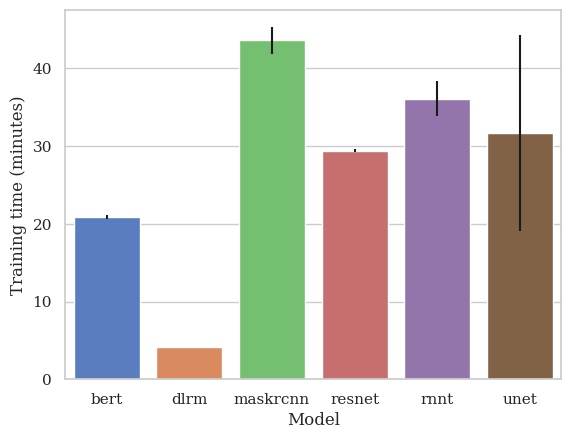

In [5]:
data = summarydf.groupby(["model"]).agg({"time_m":["mean", "std"]})

fig, ax = plt.subplots()
ax = sns.barplot(x=data.index, y=data[("time_m", "mean")], yerr=data[("time_m", "std")]) 
ax.set_ylabel("Training time (minutes)")
ax.set_xlabel("Model")

# MLLOG

In [6]:
cmap_mean = "PuBu"
cmap_std = "Oranges"
# cmap_mean = sns.dark_palette("blue", as_cmap=True)
cmap_std = sns.light_palette("orange", as_cmap=True)

summarydf.groupby(["model"]).agg({"mean", "std"})[
    ["energy_kWh_time", "duration_time(min)", "gpu_utilization_time", "cpu_utilization_time"]
    ].style.background_gradient(subset=[
        ("gpu_utilization_time", "mean")
        ],cmap=cmap_mean, vmin=50, vmax=100, axis=0,
    ).background_gradient(subset=[
        ("cpu_utilization_time", "mean")
        ],cmap=cmap_mean, vmin=0, vmax=50, axis=0
    ).background_gradient(subset=[
        ("energy_kWh_time", "mean")
        ],cmap=cmap_mean, axis=0
    ).background_gradient(subset=[
        ("duration_time(min)", "mean")
        ],cmap=cmap_mean, axis=0
    ).background_gradient(subset=[
        ("duration_time(min)", "std"), ("gpu_utilization_time", "std"), ("cpu_utilization_time", "std"), ("energy_kWh_time", "std")
        ],cmap=cmap_std, axis=0, low=0, high=-0.7
    ) #.format("{:.2f}")
    # .to_latex(
    # processed_log_dir+"/table.tex", 
    # caption="Training statistics.",
    # convert_css=True,
    # )

In [7]:
summarydf.columns

Index(['model', 'job', 'energy_kWh', 'energy_joule',
       'energy_consumption_since_previous_measurement_milliJ', 'sub_seed',
       'start_time_ms', 'end_time_ms', 'mllog_train_samples',
       'mllog_eval_samples', 'node_nb', 'time_ms', 'time_s', 'time_m',
       'run_start', 'run_stop', 'init_start', 'init_stop', 'energy_kWh_run',
       'cpu_utilization_run', 'gpu_utilization_run', 'energy_kWh_init',
       'cpu_utilization_init', 'gpu_utilization_init', 'energy_kWh_time',
       'cpu_utilization_time', 'gpu_utilization_time', 'duration_run',
       'duration_init', 'duration_time', 'duration_run(min)',
       'duration_init(min)', 'duration_time(min)', 'ILO_energy_kWh',
       'ILO_energy_kWh_run', 'ILO_energy_kWh_init', 'ILO_energy_kWh_time'],
      dtype='object')

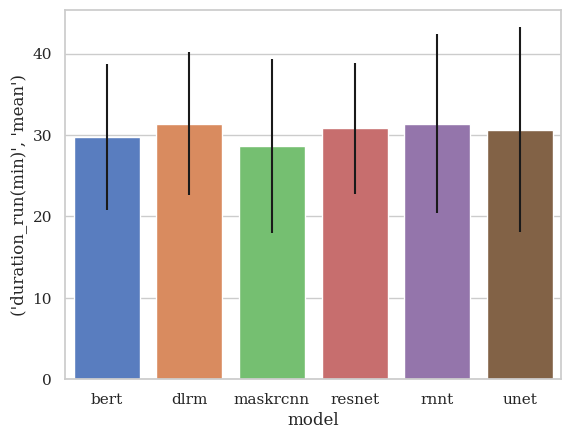

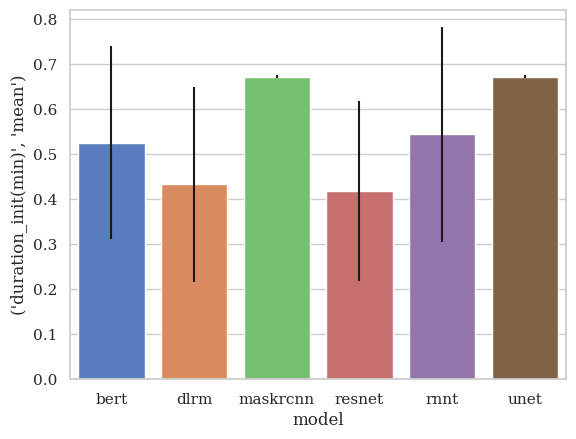

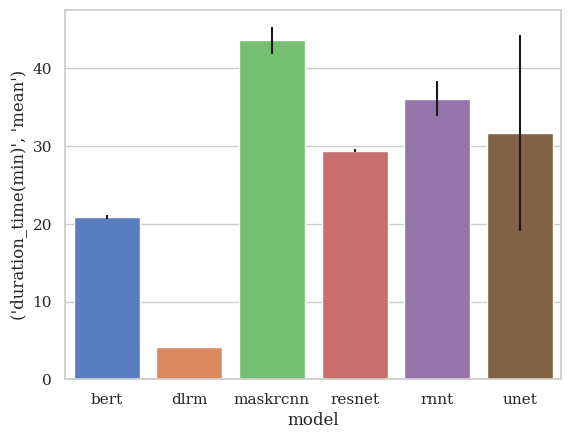

In [8]:
ML_TIME_CONSTANTS = {
    "run": {"start": "run_start", "stop": "run_stop"},
    "init": {"start": "init_start", "stop": "init_stop"},
    "time": {"start": "start_time_ms", "stop": "end_time_ms"}
}

for time_key in ML_TIME_CONSTANTS.keys():
    col = f"duration_{time_key}(min)"
    data = summarydf.groupby(["model"])[[col]].agg({"mean", "std"}).reset_index()
    sns.barplot(data=data, y=(col, "mean"), x="model", yerr=data[(col, "std")])
    plt.show()

In [9]:
sns.relplot(data=data, x="duration_time(min)", y="energy_kWh", hue="model")

ValueError: Could not interpret value `energy_kWh` for parameter `y`

# part manufacturing / usage de Resnet

	Usage	Manufacturing
GWP (kg CO2eq)	1.05E+00	8.09E-02
ADP (kg Sbeq)	1.98E-07	4.14E-06
PE (MJ)	2.68E+01	1.01E+00

In [ ]:
import pandas as pd

data = {
    'Impact': ['GWP (kg CO2eq)', 'ADP (kg Sbeq)', 'PE (MJ)'],
    'Usage_value': [1.05E+00, 1.98E-07, 2.68E+01],
    'Manufacturing_value': [8.09E-02, 4.14E-06, 1.01E+00]
}

df = pd.DataFrame(data)

df

,Impact,Usage_value,Manufacturing_value
0,GWP (kg CO2eq),1.050000e+00,0.080900
1,ADP (kg Sbeq),1.980000e-07,0.000004
2,PE (MJ),2.680000e+01,1.010000


In [ ]:
df["Usage"] = df["Usage_value"] / (df["Usage_value"] + df["Manufacturing_value"])
df["Manufacturing"] = df["Manufacturing_value"] / (df["Usage_value"] + df["Manufacturing_value"])

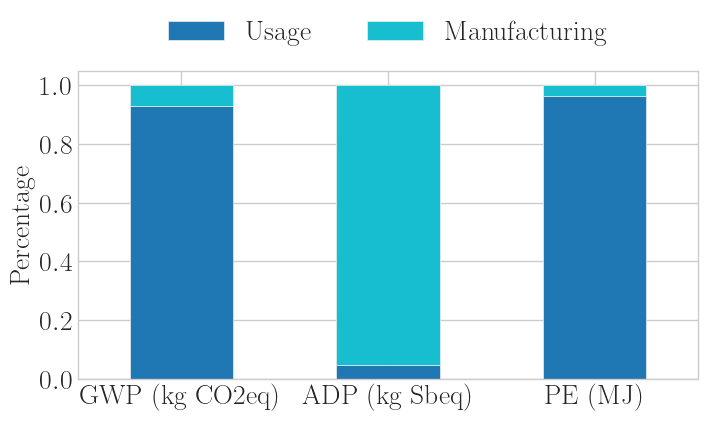

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
FONTSIZE = 20

ax = df.plot(kind='bar', x='Impact', y=['Usage', 'Manufacturing'], 
    stacked=True,
    colormap="tab10",
    ax=ax,
    fontsize=FONTSIZE,
    )

legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=FONTSIZE)
ax.set_ylabel('Percentage', fontsize=FONTSIZE)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Set x-tick labels horizontally

graph_dir = "/Users/mathildepro/Documents/code_projects/hpe_logs/graphs/power"
fig.savefig(f"{graph_dir}/total_cost.png", bbox_inches='tight', dpi=300)
fig.savefig(f"{graph_dir}/total_cost.pdf", bbox_inches='tight', dpi=300)

# Manufacturing of components [Jetson]

In [125]:
import pandas as pd

dfcopy = pd.read_clipboard()
df = dfcopy.copy()

In [126]:
df

,GPU Compute chip,GPU Memory chips,GPU Board,Total,RAM,CPU,others_old,Others
GWP (kg CO2eq),3.450000e-01,2.990000e+00,3.42000,6.75000,52.000,10.0000,373.0000,9.56000
ADP (kg Sbeq),4.330000e-08,3.750000e-07,0.00155,0.00155,0.003,0.0204,0.0739,0.00125
PE (MJ),5.330000e+00,4.610000e+01,67.90000,119.00000,700.000,168.0000,5210.0000,134.00000


In [127]:
df.drop(columns=["others_old", "Total"], inplace=True)
df["Total"] = df.sum(axis=1)
df = df.div(df["Total"], axis=0)
df = df.reset_index(names="Impact")
df.drop(columns=["Total"], inplace=True)

In [128]:
df

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,Others
0,GWP (kg CO2eq),0.004405,0.038179,0.043670,0.663985,0.127689,0.122071
1,ADP (kg Sbeq),0.000002,0.000014,0.059159,0.114502,0.778614,0.047709
2,PE (MJ),0.004753,0.041112,0.060553,0.624259,0.149822,0.119501


In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-white')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 15,
    "font.size": 15,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 13,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
}

plt.rcParams.update(tex_fonts)

from seaborn import axes_style
theme_dict = {**axes_style("white"), "grid.linestyle": ":"}


In [130]:
df

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,Others
0,GWP (kg CO2eq),0.004405,0.038179,0.043670,0.663985,0.127689,0.122071
1,ADP (kg Sbeq),0.000002,0.000014,0.059159,0.114502,0.778614,0.047709
2,PE (MJ),0.004753,0.041112,0.060553,0.624259,0.149822,0.119501


In [131]:
df = df.melt(id_vars=["Impact"])
df = df.rename(columns={"variable": "Component", "value": "Percentage"})
df["Percentage"] = df["Percentage"] * 100
df


,Impact,Component,Percentage
0,GWP (kg CO2eq),GPU Compute chip,0.440529
1,ADP (kg Sbeq),GPU Compute chip,0.000165
2,PE (MJ),GPU Compute chip,0.475328
3,GWP (kg CO2eq),GPU Memory chips,3.817915
4,ADP (kg Sbeq),GPU Memory chips,0.001431
5,PE (MJ),GPU Memory chips,4.111189
6,GWP (kg CO2eq),GPU Board,4.366980
7,ADP (kg Sbeq),GPU Board,5.915936
8,PE (MJ),GPU Board,6.055309
9,GWP (kg CO2eq),RAM,66.398519


In [132]:
plt.rcParams.items()

ItemsView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both

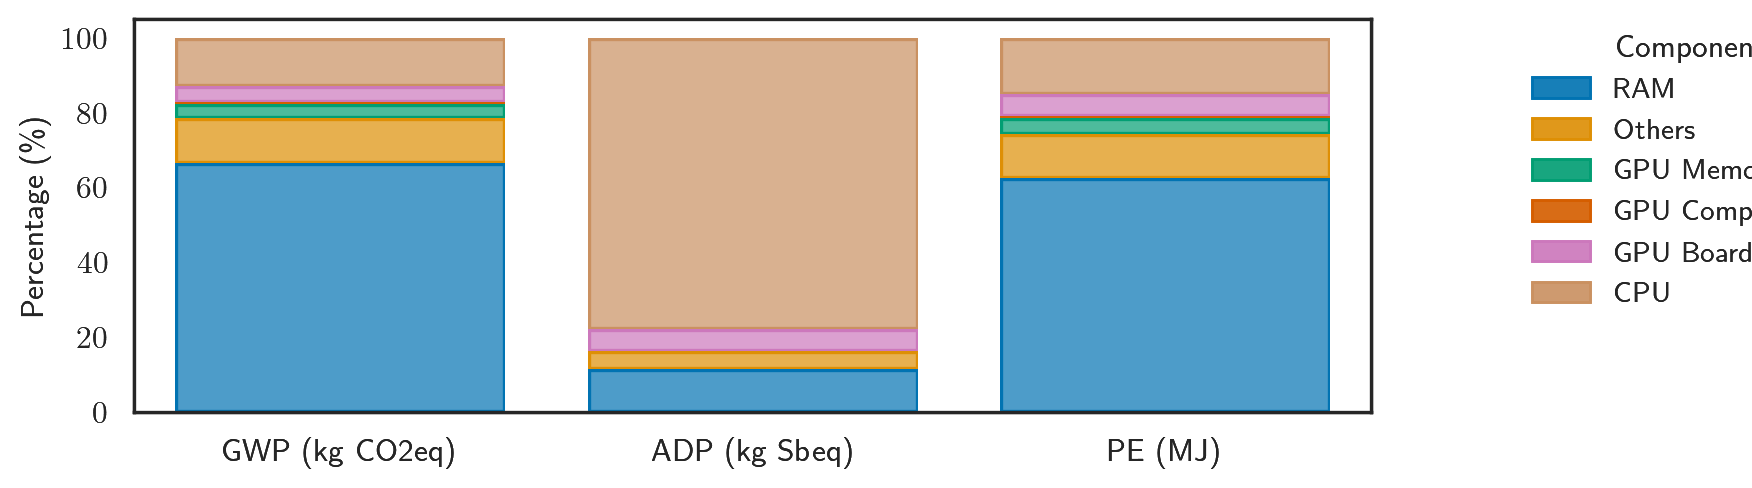

In [135]:
f = plt.Figure(figsize=(8,3))
theme_dict = {
    **axes_style("white"), 
    # "grid.linestyle": ":",
    'xtick.labelsize': 12.0,
    'ytick.labelsize': 12.0,
    'font.size': 12.0,
    'legend.framealpha': 0,
    'figure.labelsize': 12,
    'axes.labelsize': 12.0,}

graph_dir = "/Users/mathildepro/Documents/code_projects/thèse/"

(
    so.Plot(df.sort_values(by="Component", ascending=False), "Impact", "Percentage", color="Component") #, marker="Part")
    .add(so.Bar(), so.Stack()) 
    .scale(color="colorblind")
    .label(
        x=None, 
        y="Percentage (\%)",
        # color=None,
        # title="FU1"
    )
    .theme(theme_dict)
    .layout(engine="tight")
    .on(f)
    .save(f"{graph_dir}/distribution_manufacturing_jetson.pdf", 
          bbox_inches='tight', dpi=300, 
          edgecolor=None,
          )
)

# Manufacturing of components [Champollion]

In [26]:
data = {
    '': ['GPU Compute chip', 'GPU Memory chips', 'GPU Board', 'RAM', 'CPU', 'others'],
    'GWP (kg CO2eq)': [1.33E+02, 8.90E+02, 8.41E+01, 1.50E+03, 6.20E+01, 2.23E+02],
    'ADP (kg Sbeq)': [3.91E-05, 2.48E-02, 1.44E-02, 4.40E-02, 4.08E-02, 2.39E-02],
    'PE (MJ)': [1.79E+03, 1.11E+04, 1.21E+03, 1.80E+04, 9.00E+02, 3.11E+03]
}

df = pd.DataFrame(data)

In [27]:
df = df.T.set_axis(df.T.iloc[0], axis=1)[1:]
df["Total"] = df.sum(axis=1)

df = df.div(df["Total"], axis=0)

df = df.reset_index(names="Impact")

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,others,Total
0,GWP (kg CO2eq),0.045987,0.307735,0.029079,0.518654,0.021438,0.077107,1.0
1,ADP (kg Sbeq),0.000264,0.167637,0.097337,0.29742,0.275789,0.161553,1.0
2,PE (MJ),0.049571,0.307394,0.033509,0.498477,0.024924,0.086126,1.0


In [28]:
df.drop(columns=["Total"], inplace=True)
df

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,others
0,GWP (kg CO2eq),0.045987,0.307735,0.029079,0.518654,0.021438,0.077107
1,ADP (kg Sbeq),0.000264,0.167637,0.097337,0.29742,0.275789,0.161553
2,PE (MJ),0.049571,0.307394,0.033509,0.498477,0.024924,0.086126


In [136]:
import pandas as pd

dfcopy = pd.read_clipboard()
df = dfcopy.copy()

In [137]:
df

,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,others_old,Others
GWP (kg CO2eq),133.000000,890.0000,84.1000,1500.000,62.0000,223.0000,595.0000
ADP (kg Sbeq),0.000039,0.0248,0.0144,0.044,0.0408,0.0239,0.0775
PE (MJ),1790.000000,11100.0000,1210.0000,18000.000,900.0000,3110.0000,8320.0000


In [138]:
df.drop(columns=["others_old"], inplace=True)
df["Total"] = df.sum(axis=1)
df = df.div(df["Total"], axis=0)
df = df.reset_index(names="Impact")
df.drop(columns=["Total"], inplace=True)

In [139]:
df

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,Others
0,GWP (kg CO2eq),0.040746,0.272663,0.025765,0.459545,0.018995,0.182286
1,ADP (kg Sbeq),0.000194,0.123053,0.071450,0.218320,0.202442,0.384541
2,PE (MJ),0.043320,0.268635,0.029284,0.435624,0.021781,0.201355


In [140]:
import matplotlib.pyplot as plt

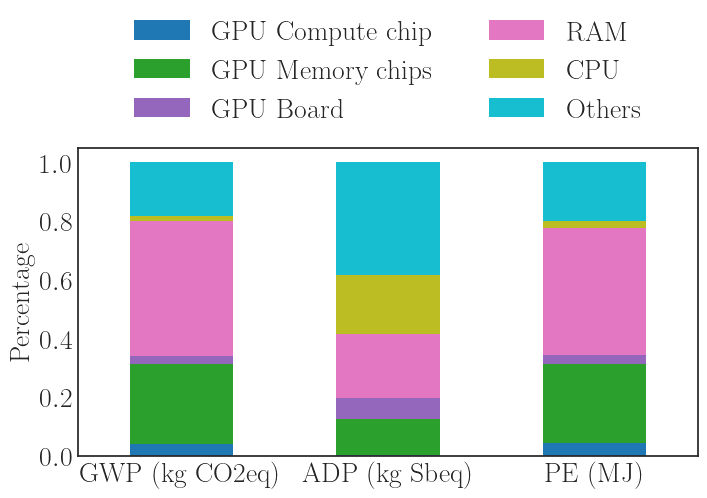

In [141]:
fig, ax = plt.subplots(figsize=(8,4))
FONTSIZE = 20

ax = df.plot(kind='bar', x='Impact', 
    stacked=True,
    colormap="tab10",
    ax=ax,
    fontsize=FONTSIZE,
    )
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=FONTSIZE)
ax.set_ylabel('Percentage', fontsize=FONTSIZE)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Set x-tick labels horizontally

graph_dir = "/Users/mathildepro/Documents/code_projects/hpe_logs/graphs/power"
fig.savefig(f"{graph_dir}/manufacturing.png", bbox_inches='tight', dpi=300)
fig.savefig(f"{graph_dir}/manufacturing.pdf", bbox_inches='tight', dpi=300)

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-white')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 15,
    "font.size": 15,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 13,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13
}

plt.rcParams.update(tex_fonts)

from seaborn import axes_style
theme_dict = {**axes_style("white"), "grid.linestyle": ":"}


In [143]:
df

,Impact,GPU Compute chip,GPU Memory chips,GPU Board,RAM,CPU,Others
0,GWP (kg CO2eq),0.040746,0.272663,0.025765,0.459545,0.018995,0.182286
1,ADP (kg Sbeq),0.000194,0.123053,0.071450,0.218320,0.202442,0.384541
2,PE (MJ),0.043320,0.268635,0.029284,0.435624,0.021781,0.201355


In [144]:
df = df.melt(id_vars=["Impact"])
df = df.rename(columns={"variable": "Component", "value": "Percentage"})
df["Percentage"] = df["Percentage"] * 100
df


,Impact,Component,Percentage
0,GWP (kg CO2eq),GPU Compute chip,4.074630
1,ADP (kg Sbeq),GPU Compute chip,0.019401
2,PE (MJ),GPU Compute chip,4.332043
3,GWP (kg CO2eq),GPU Memory chips,27.266321
4,ADP (kg Sbeq),GPU Memory chips,12.305305
5,PE (MJ),GPU Memory chips,26.863504
6,GWP (kg CO2eq),GPU Board,2.576514
7,ADP (kg Sbeq),GPU Board,7.145016
8,PE (MJ),GPU Board,2.928364
9,GWP (kg CO2eq),RAM,45.954474


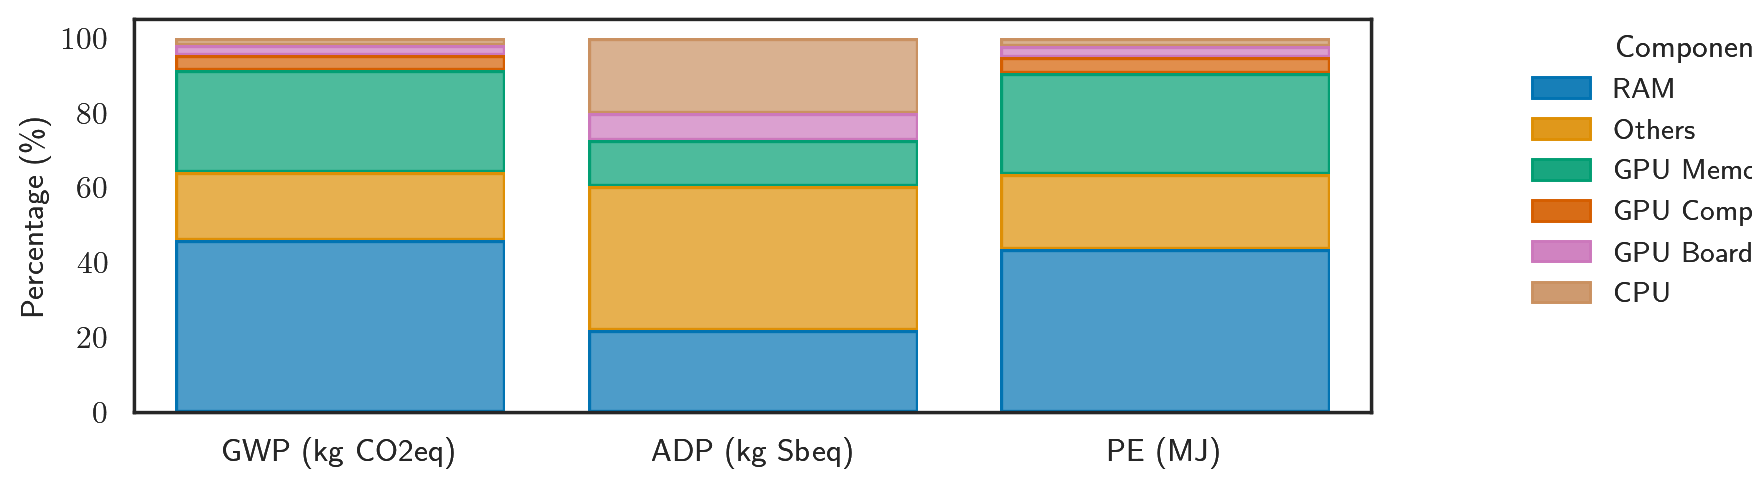

In [145]:
f = plt.Figure(figsize=(8,3))
theme_dict = {
    **axes_style("white"), 
    # "grid.linestyle": ":",
    'xtick.labelsize': 12.0,
    'ytick.labelsize': 12.0,
    'font.size': 12.0,
    'legend.framealpha': 0,
    'figure.labelsize': 12,
    'axes.labelsize': 12.0,}

graph_dir = "/Users/mathildepro/Documents/code_projects/thèse/"

(
    so.Plot(df.sort_values(by="Component", ascending=False), "Impact", "Percentage", color="Component") #, marker="Part")
    .add(so.Bar(), so.Stack()) 
    .scale(color="colorblind")
    .label(
        x=None, 
        y="Percentage (\%)",
        # color=None,
        # title="FU1"
    )
    .theme(theme_dict)
    .layout(engine="tight")
    .on(f)
    .save(f"{graph_dir}/distribution_manufacturing_champollion.pdf", 
          bbox_inches='tight', dpi=300, 
          edgecolor=None,
          )
)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


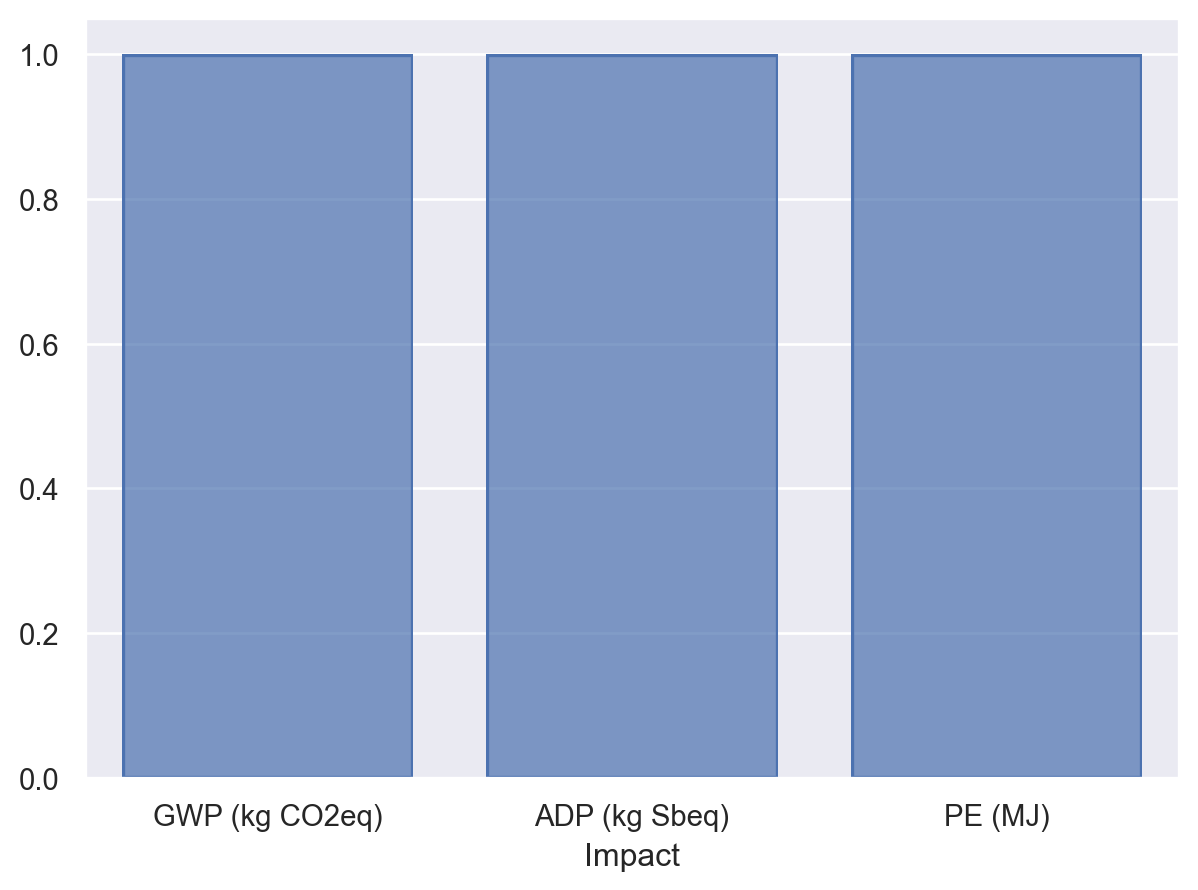

In [ ]:
import seaborn.objects as so
so.Plot(data=df, x="Impact").add(so.Bar(), so.Hist(binwidth=10), so.Stack())

# Corrélations

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = ["bert", "dlrm", "maskrcnn", "resnet", "rnnt", "unet"]
processed_log_dir = "/Users/mathildepro/Documents/code_projects/hpe_logs/resultats_nov_processed"
summarydf = pd.read_csv(f"{processed_log_dir}/summary.csv").drop(columns=["Unnamed: 0"])

In [146]:
# dfcopy = pd.read_clipboard()
df = dfcopy.copy()
df

,Number of parameters (M),dataset nb,dataset gb,batch nb,batch gb,avg power,avg power ilo,Model
0,25.6,1.280000e+06,167,408,53,3425,2612,resnet
1,19.0,6.720000e+04,40,56,229,3275,2970,unet
2,25.6,4.000000e+04,20,96,48,3074,2903,maskrcnn
3,29.8,2.780000e+05,500,1536,2763,3330,2549,rnnt
4,345.0,3.000000e+06,400,384,51,3289,3519,bert
5,540.0,3.780000e+09,342,55296,5,2265,2738,dlrm


In [147]:
# import pandas as pd
# data = {
#     'Model': ['resnet', 'unet', 'maskrcnn', 'rnnt', 'bert', 'dlrm'],
#     'Parameters (M)': [25.6, 19, 25.6, 29.76, 345, 540],
#     'Size (GB)': [167.62, 40, 20, 500, 400, 342],
#     'Number of samples': [1280000, 67200, 40000, 278000, 3000000, 3780000000],
#     'Samples': [3, 4, 5, 2, 1, 1],
#     # 'energy': [1.605368, 1.725078, 2.156573, 1.973846, 1.130645, 0.135582]
# }

# df = pd.DataFrame(data) #, index=data["energy"]).drop(columns=["energy", "Model"])

df.dtypes

Number of parameters (M)    float64
dataset nb                  float64
dataset gb                    int64
batch nb                      int64
batch gb                      int64
avg power                     int64
avg power ilo                 int64
Model                        object
dtype: object

In [150]:
mean_df = summarydf.merge(df, left_on="model", right_on="Model").drop(columns=["Model"]).groupby(["model"]).mean()
mean_df.index

Index(['bert', 'dlrm', 'maskrcnn', 'resnet', 'rnnt', 'unet'], dtype='object', name='model')

In [151]:
mean_df[mean_df.index!="dlrm"]


,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,sub_seed,start_time_ms,end_time_ms,mllog_train_samples,mllog_eval_samples,node_nb,...,ILO_energy_kWh_run,ILO_energy_kWh_init,ILO_energy_kWh_time,Number of parameters (M),dataset nb,dataset gb,batch nb,batch gb,avg power,avg power ilo
model,,,,,,,,,,,,,,,,,,,,,
bert,126233.071429,1.146999,4.129198e+06,4.129198e+09,39.428571,1.699293e+12,1.699294e+12,2.970926e+06,10000.0,1.0,...,0.000000,0.000000,1.165629,345.0,3000000.0,400.0,384.0,51.0,3289.0,3519.0
maskrcnn,126857.500000,2.174072,7.826660e+06,7.826660e+09,NaN,1.699561e+12,1.699564e+12,4.000000e+04,1.0,1.0,...,0.000000,0.000000,2.149048,25.6,40000.0,20.0,96.0,48.0,3074.0,2903.0
resnet,127385.500000,1.639150,5.900940e+06,5.900940e+09,26.500000,1.699945e+12,1.699947e+12,1.281167e+06,50000.0,1.0,...,0.600610,0.001918,1.243094,25.6,1280000.0,167.0,408.0,53.0,3425.0,2612.0
rnnt,126709.000000,1.988993,7.160374e+06,7.160374e+09,27.941176,1.699483e+12,1.699485e+12,2.780160e+05,2703.0,1.0,...,0.336193,0.000000,1.525456,29.8,278000.0,500.0,1536.0,2763.0,3330.0,2549.0
unet,126525.000000,1.740208,6.264749e+06,6.264749e+09,28.384615,1.699394e+12,1.699396e+12,1.680000e+02,42.0,1.0,...,1.518620,0.010985,1.549857,19.0,67200.0,40.0,56.0,229.0,3275.0,2970.0


In [152]:
mean_df.columns

Index(['job', 'energy_kWh', 'energy_joule',
       'energy_consumption_since_previous_measurement_milliJ', 'sub_seed',
       'start_time_ms', 'end_time_ms', 'mllog_train_samples',
       'mllog_eval_samples', 'node_nb', 'time_ms', 'time_s', 'time_m',
       'run_start', 'run_stop', 'init_start', 'init_stop', 'energy_kWh_run',
       'cpu_utilization_run', 'gpu_utilization_run', 'energy_kWh_init',
       'cpu_utilization_init', 'gpu_utilization_init', 'energy_kWh_time',
       'cpu_utilization_time', 'gpu_utilization_time', 'duration_run',
       'duration_init', 'duration_time', 'duration_run(min)',
       'duration_init(min)', 'duration_time(min)', 'ILO_energy_kWh',
       'ILO_energy_kWh_run', 'ILO_energy_kWh_init', 'ILO_energy_kWh_time',
       'Number of parameters (M)', 'dataset nb', 'dataset gb', 'batch nb',
       'batch gb', 'avg power', 'avg power ilo'],
      dtype='object')

In [188]:
col = "Number of parameters (M)"
mean_df["norm_param"] = (mean_df[col] - mean_df[col].min())/(mean_df[col].max()-mean_df[col].min())
col = "dataset nb"
mean_df["norm_data"] = (mean_df[col] - mean_df[col].min())/(mean_df[col].max()-mean_df[col].min())

In [193]:
mean_df["norm_param_X_samples"] = mean_df["norm_param"] + mean_df["norm_data"]
mean_df["param_X_samples"] = mean_df["Number of parameters (M)"] + mean_df["dataset nb"]

In [194]:
mean_df

,job,energy_kWh,energy_joule,energy_consumption_since_previous_measurement_milliJ,sub_seed,start_time_ms,end_time_ms,mllog_train_samples,mllog_eval_samples,node_nb,...,dataset nb,dataset gb,batch nb,batch gb,avg power,avg power ilo,norm_param,norm_data,norm_param_X_samples,param_X_samples
model,,,,,,,,,,,,,,,,,,,,,
bert,126233.071429,1.146999,4.129198e+06,4.129198e+09,39.428571,1.699293e+12,1.699294e+12,2.970926e+06,10000.0,1.0,...,3.000000e+06,400.0,384.0,51.0,3289.0,3519.0,0.625720,0.000783,0.626503,3.000345e+06
dlrm,126304.500000,0.149275,5.373891e+05,5.373891e+08,NaN,1.699295e+12,1.699295e+12,3.775334e+09,89137319.0,1.0,...,3.780000e+09,342.0,55296.0,5.0,2265.0,2738.0,1.000000,1.000000,2.000000,3.780001e+09
maskrcnn,126857.500000,2.174072,7.826660e+06,7.826660e+09,NaN,1.699561e+12,1.699564e+12,4.000000e+04,1.0,1.0,...,4.000000e+04,20.0,96.0,48.0,3074.0,2903.0,0.012668,0.000000,0.012668,4.002560e+04
resnet,127385.500000,1.639150,5.900940e+06,5.900940e+09,26.500000,1.699945e+12,1.699947e+12,1.281167e+06,50000.0,1.0,...,1.280000e+06,167.0,408.0,53.0,3425.0,2612.0,0.012668,0.000328,0.012996,1.280026e+06
rnnt,126709.000000,1.988993,7.160374e+06,7.160374e+09,27.941176,1.699483e+12,1.699485e+12,2.780160e+05,2703.0,1.0,...,2.780000e+05,500.0,1536.0,2763.0,3330.0,2549.0,0.020729,0.000063,0.020792,2.780298e+05
unet,126525.000000,1.740208,6.264749e+06,6.264749e+09,28.384615,1.699394e+12,1.699396e+12,1.680000e+02,42.0,1.0,...,6.720000e+04,40.0,56.0,229.0,3275.0,2970.0,0.000000,0.000007,0.000007,6.721900e+04


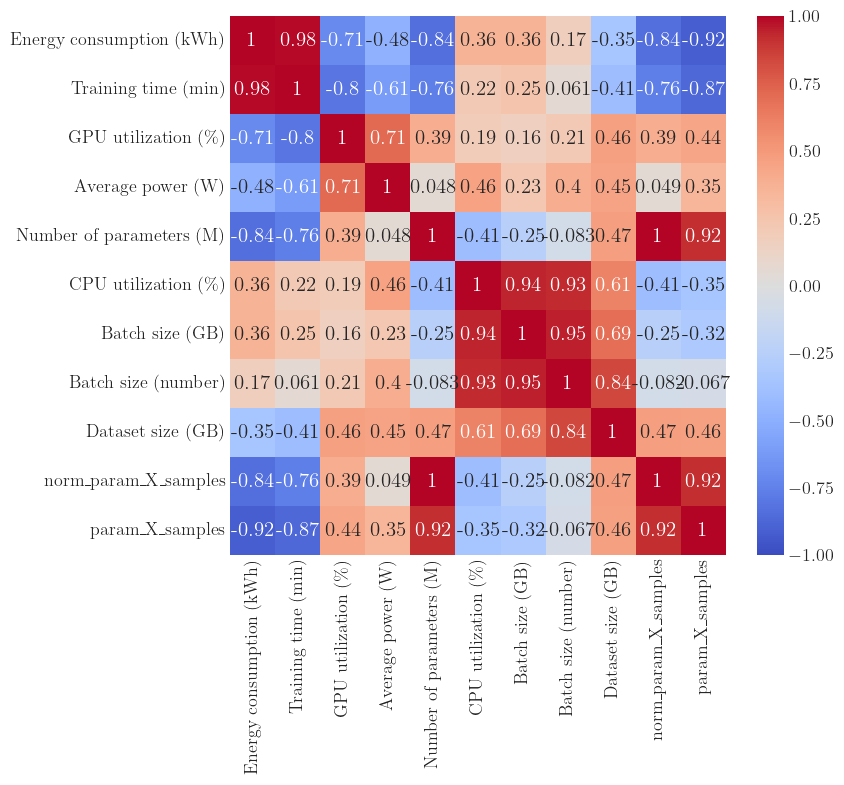

In [202]:
fig, ax = plt.subplots(figsize=(8,7))
cols = ["energy_kWh", "duration_time(min)", "gpu_utilization_time", "avg power", 'Number of parameters (M)', "cpu_utilization_time","batch gb",  "batch nb",  'dataset gb',"norm_param_X_samples", "param_X_samples"]
data = mean_df[cols][mean_df.index!="dlrm"].rename(columns={ # 
    "duration_time(min)": "Training time (min)", 
    "gpu_utilization_time": "GPU utilization (\%)", 
    "cpu_utilization_time": "CPU utilization (\%)",
    "energy_kWh": "Energy consumption (kWh)",
    "avg power": "Average power (W)",
    # "avg power ilo": "ILO average power (W)",
    "batch nb": "Batch size (number)",
    "batch gb": "Batch size (GB)",
    "dataset gb": "Dataset size (GB)",
    })
g = sns.heatmap(ax=ax, data=data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
# g.set_xticklabels(g.get_xticklabels(), rotation = 75)
graph_dir = "/Users/mathildepro/Documents/code_projects/hpe_logs/graphs/power"
fig.savefig(f"{graph_dir}/correlation.pdf", bbox_inches='tight', dpi=300)

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


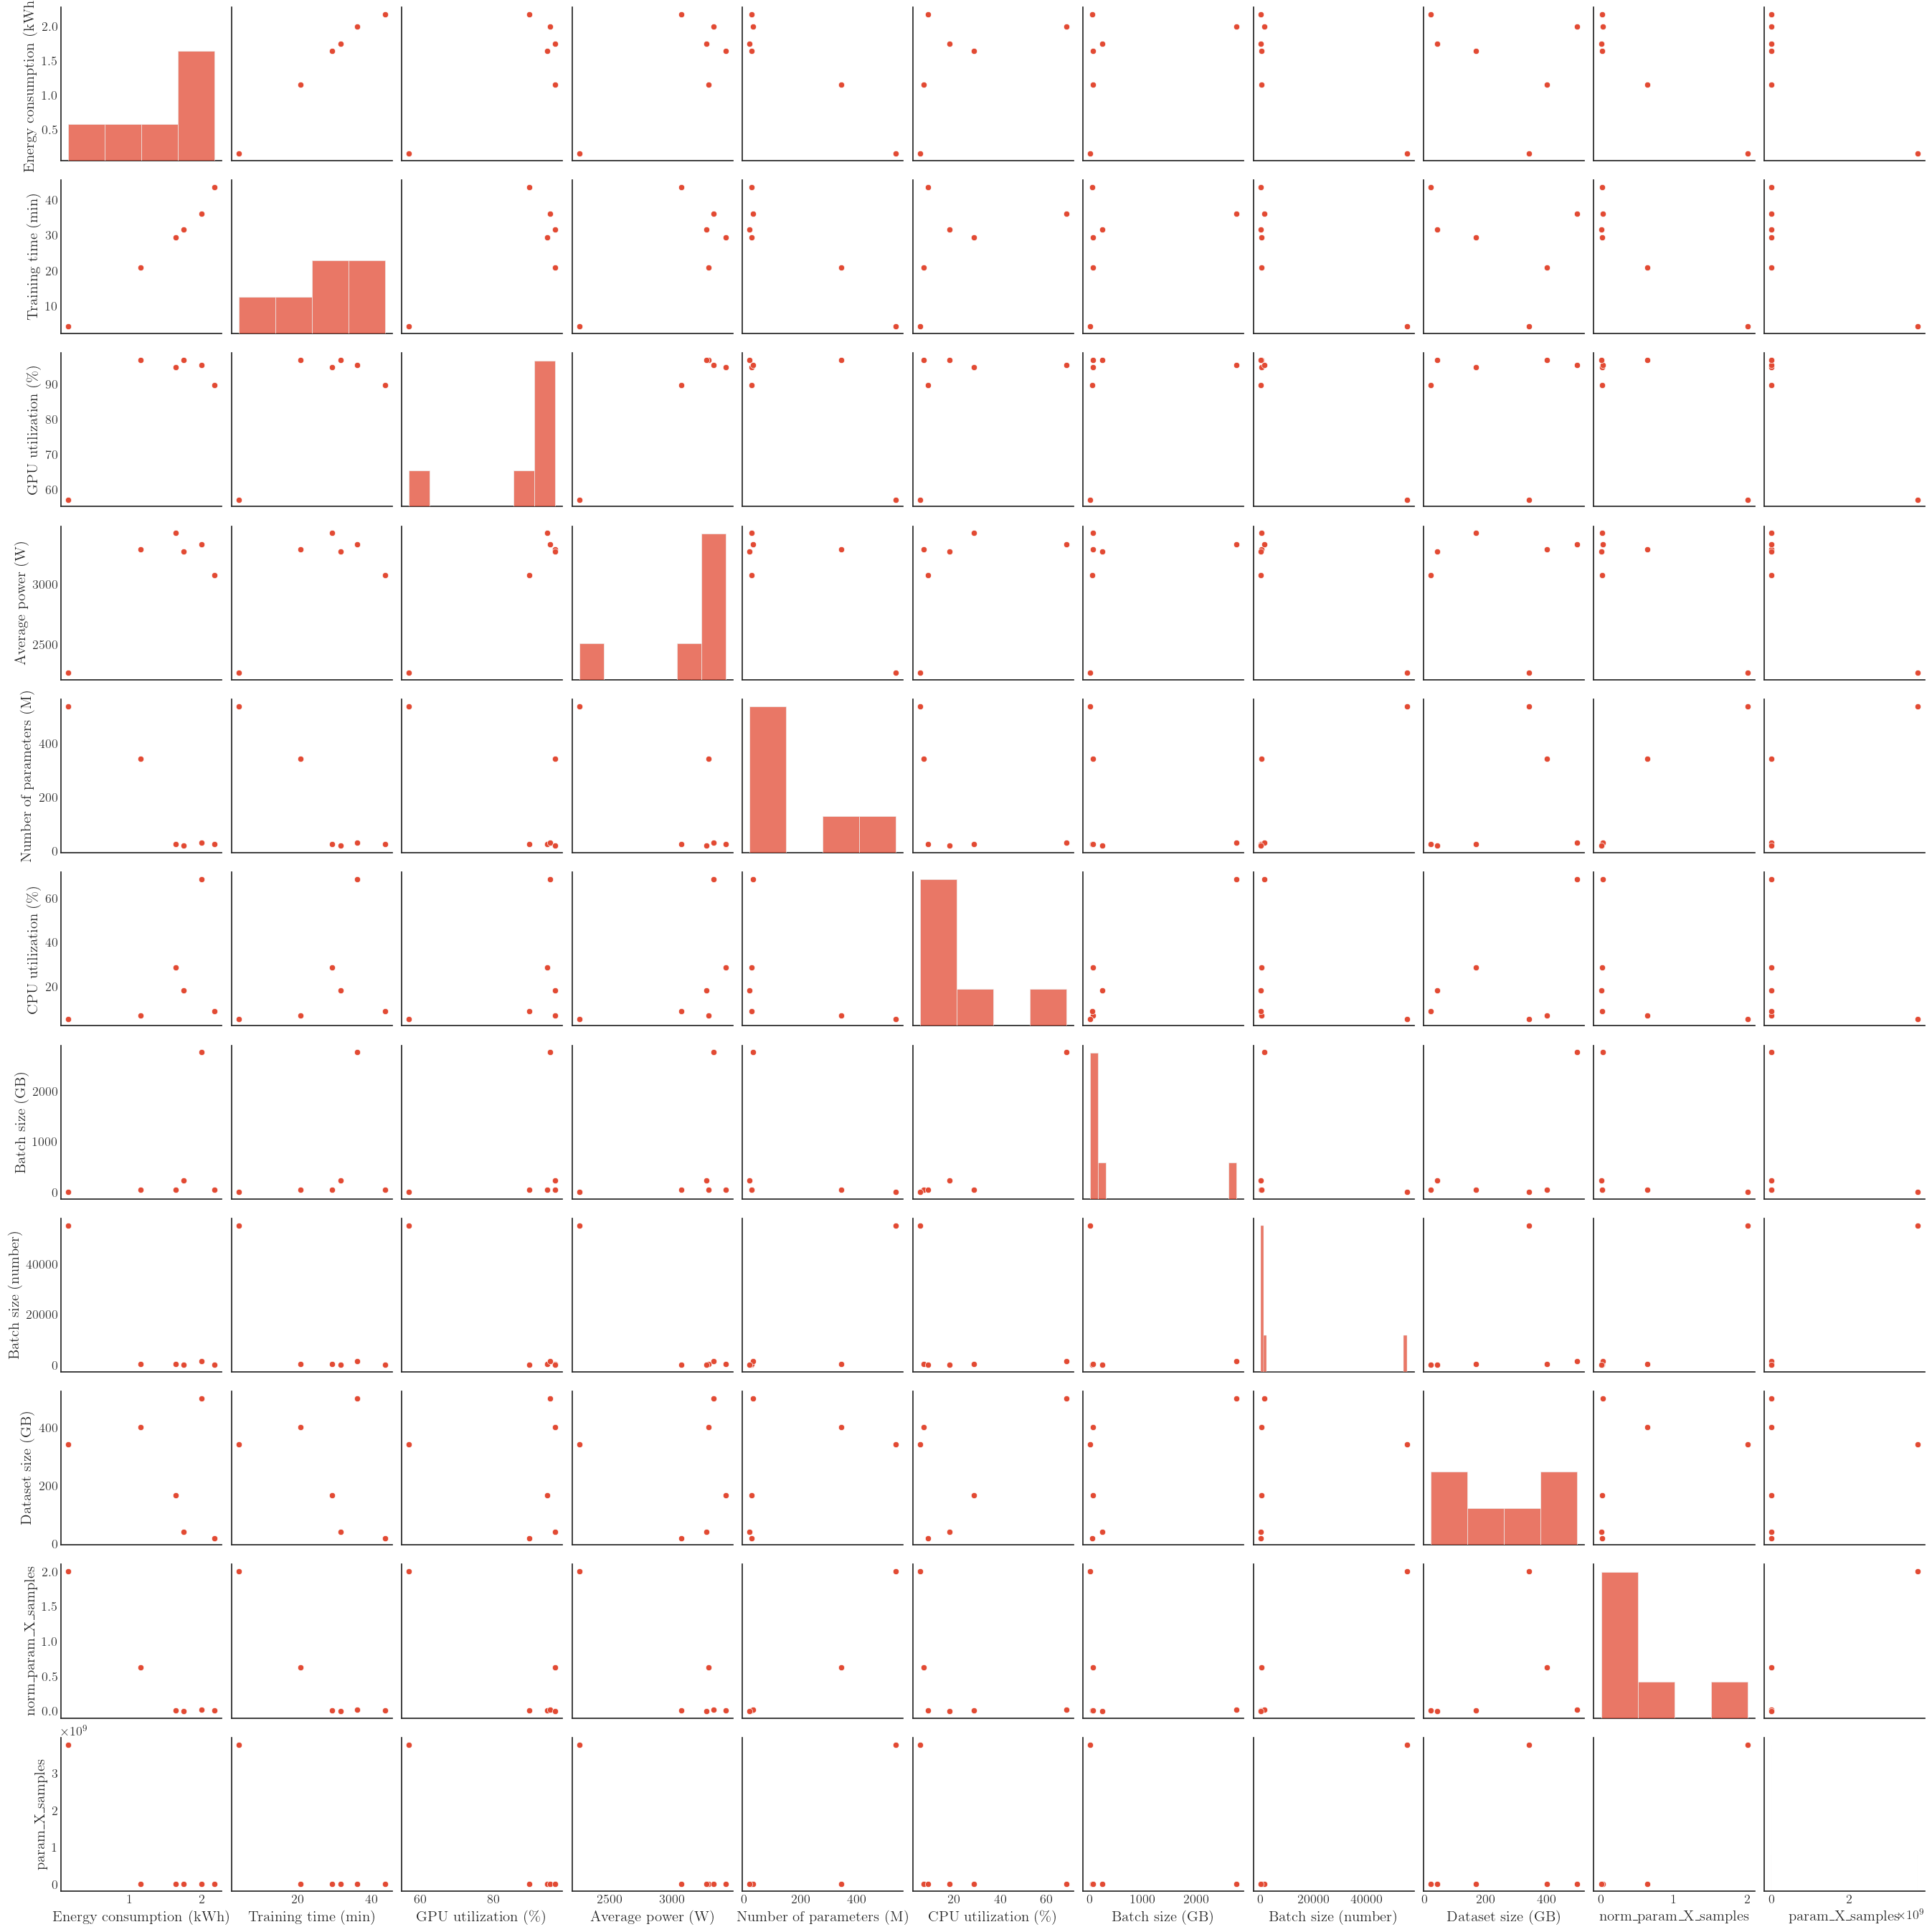

In [198]:
sns.pairplot(data=data)

In [203]:
3.32/1.61

2.062111801242236

In [207]:
1-(75.9-45)/75.9

0.592885375494071

In [206]:
(45-75.9)/45

-0.6866666666666668